## IMPORTING LIBRARIES

In [2]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     -------------------------------------- 102.6/102.6 kB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 429.4/429.4 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

## Load the DataSet

In [6]:
df = pd.read_csv("C:\\Users\\srina\\TSLA.csv")


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [8]:
# Select the closing price as predictor variable
data = df.filter(['Close']).values

### SPLIT THE DATASET INTO TRAINING AND TESTING SETS

In [9]:
train_data_len = int(np.ceil(0.8 * len(data)))
train_data = data[0:train_data_len,:]
test_data = data[train_data_len:,:]

In [10]:
# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

## Creating LSTM Model

In [11]:
# Create training data for LSTM model
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

## Reshape the Model

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))    

## Create LSTM Model

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(30, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train LSTM model
model.fit(X_train, y_train, epochs=20, batch_size=64)

# Test LSTM model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
37/37 [==============================] - 3s 25ms/step - loss: 0.0365
Epoch 2/20
37/37 [==============================] - 1s 26ms/step - loss: 0.0021
Epoch 3/20
37/37 [==============================] - 1s 32ms/step - loss: 0.0017
Epoch 4/20
37/37 [==============================] - 1s 39ms/step - loss: 0.0018
Epoch 5/20
37/37 [==============================] - 1s 33ms/step - loss: 0.0016
Epoch 6/20
37/37 [==============================] - 1s 26ms/step - loss: 0.0016
Epoch 7/20
37/37 [==============================] - 1s 37ms/step - loss: 0.0015
Epoch 8/20
37/37 [==============================] - 2s 45ms/step - loss: 0.0016
Epoch 9/20
37/37 [==============================] - 1s 32ms/step - loss: 0.0014
Epoch 10/20
37/37 [==============================] - 1s 27ms/step - loss: 0.0014
Epoch 11/20
37/37 [==============================] - 1s 38ms/step - loss: 0.0013
Epoch 12/20
37/37 [==============================] - 2s 41ms/step - loss: 0.0013
Epoch 13/20
37/37 [==================

## Plot and Visualisation

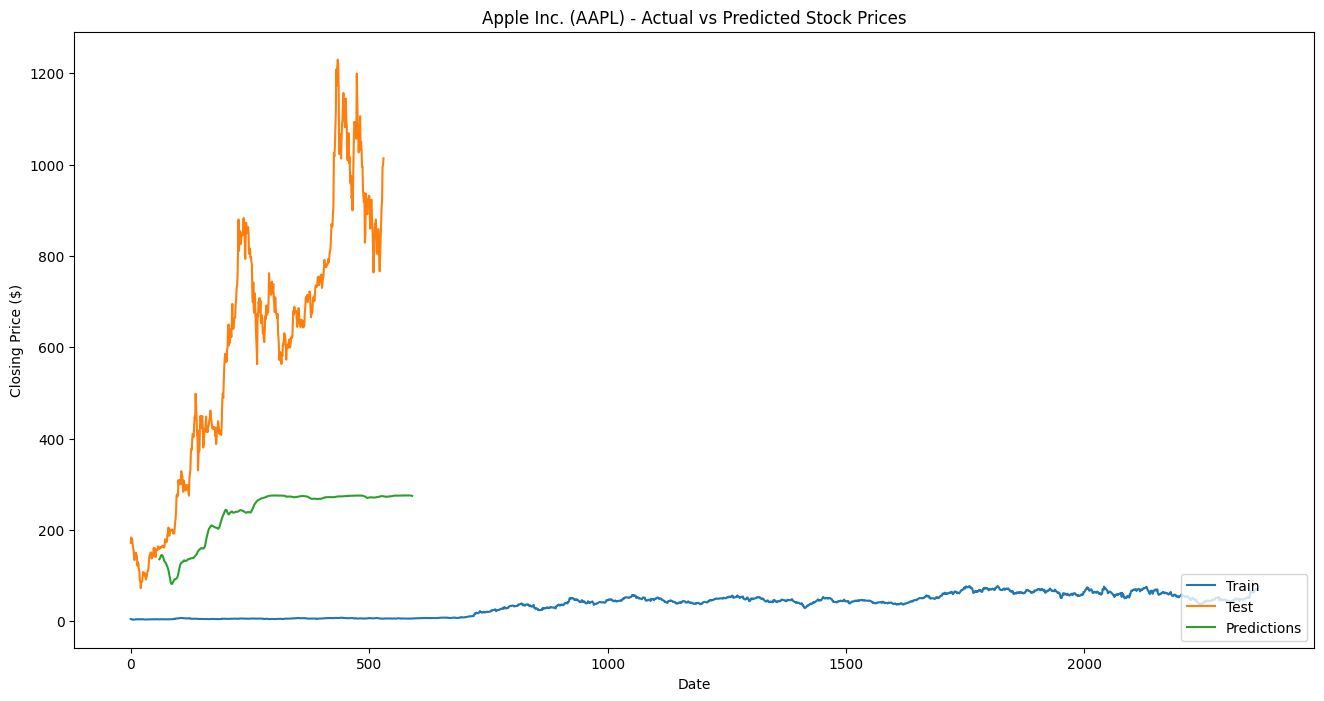

In [16]:
# Plot actual vs predicted stock prices
train = data[:train_data_len]
test = data[train_data_len+time_step:]
test_predictions = np.empty_like(test_data)
test_predictions[:, :] = np.nan
test_predictions[len(test_data)-len(predictions):, :] = predictions
plt.figure(figsize=(16,8))
plt.title('Apple Inc. (AAPL) - Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.plot(train[:, 0])
plt.plot(test[:, 0])
plt.plot(test_predictions[:, 0])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()